<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Anna Tarelina (@feuerengel), and Mikhail Korshchikov (@MS4). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2019
## <center> Part 1. Decision trees for classification and regression

**In this assignment, we will find out how a decision tree works in a regression task, then will build and tune classification decision trees for identifying heart diseases.**

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/lectures](https://mlcourse.ai/lectures) 

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1-xvxl0xjV4voDYIbcCxxpAc_pjcWEpnLQ9kaKLHwXsA). Solutions will be shared only with those who've filled in this form 
 
### <center> Deadline for A2: 2019 October 6, 20:59 CET (London time)

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [56]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Decision trees for regression: a toy example

Let's consider the following one-dimensional regression problem. We need to build a function $\large a(x)$ to approximate the dependency $\large y = f(x)$ using the mean-squared error criterion: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

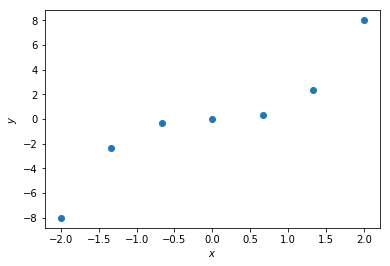

In [135]:
X= np.linspace(-2,2,7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

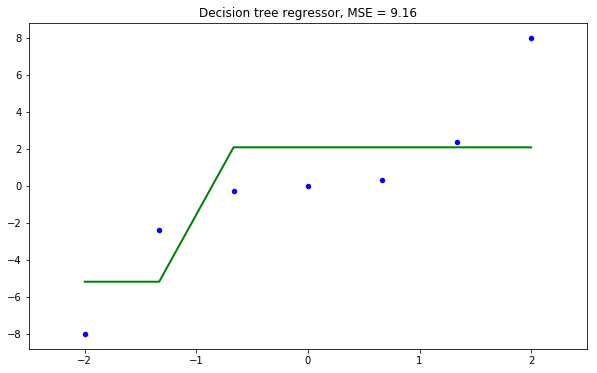

In [77]:
from sklearn.tree import DecisionTreeRegressor    # Import decision tree classifier model

n=7

reg_tree = DecisionTreeRegressor(max_depth=1, random_state=17,splitter='best')
reg_tree.fit(X.reshape(-1,1),y.reshape(-1,1))
reg_tree_pred = reg_tree.predict(X.reshape(-1,1))

plt.figure(figsize=(10, 6))
#plt.plot(X, y, "b")
plt.scatter(X, y, c="b", s=20)
plt.plot(X, reg_tree_pred, "g", lw=2)
plt.xlim([-2.5, 2.5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y - reg_tree_pred) ** 2) / n))
plt.show()


In [78]:
#
#from pydotplus.graphviz import graph_from_dot_data
#from sklearn.tree import export_graphviz

#dot_data = export_graphviz(                           # Create dot data
#    tree, filled=True, rounded=True)
#    #class_names=['Setosa', 'Versicolor','Virginica'],
#    #feature_names=['petal length', 'petal width'],out_file=None)
#
#graph = graph_from_dot_data(dot_data)                 # Create graph from dot data

Let's make several steps to build a decision tree. In the case of a **regression** task, at prediction time, the leaf returns the average value for all observations in this leaf.

Let's start with a tree of depth 0, i.e. all observations placed in a single leaf. 

<br>You'll need to build a tree with only one node (also called **root**) that contains all train observations (instances). 
<br>How will predictions of this tree look like for $x \in [-2, 2]$? <br> Create an appropriate plot using a pen, paper and Python if needed (but no `sklearn` is needed yet).

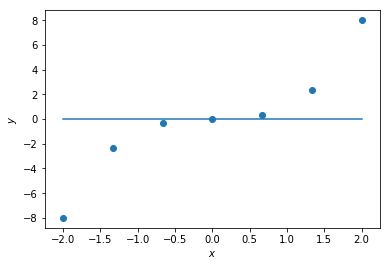

In [79]:
Zero_depth = y.mean()
Zero_depth_array = Zero_depth*np.ones(len(X))

#for i in range(len(X)):
#    Zero_depth_array[i]  = Zero_depth

plt.plot(X, Zero_depth_array)

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

**Making first splits.**
<br>Let's split the data according to the following condition $[x < 0]$. It gives us the tree of depth 1 with two leaves. To clarify, for all instances with $x \geqslant 0$ the tree will return some value, for all instances with $x < 0$ it will return another value. Let's create a similar plot for predictions of this tree.

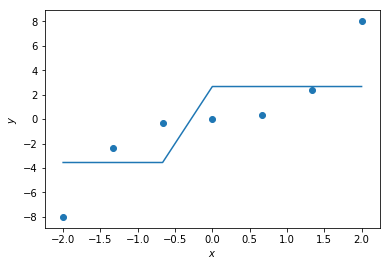

In [80]:
temp_0=0
count_0=0
temp_1=0
count_1=0

threshold = 0

for i in range(len(X)):
    if X[i]<threshold:
        temp_0=temp_0+y[i]
        count_0=count_0+1
    elif X[i]>=threshold:
        temp_1=temp_1+y[i]
        count_1=count_1+1

        
#print(count_0,count_1)        

Depth_one_0 = temp_0/count_0
Depth_one_1 = temp_1/count_1

#print(Depth_one_0,Depth_one_1)

One_depth_array = np.zeros(len(X))

for i in range(len(X)):
    if X[i]<threshold:
        One_depth_array[i]  = Depth_one_0
    elif X[i]>=threshold:
        One_depth_array[i]  = Depth_one_1
    


plt.plot(X, One_depth_array)

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In the decision tree algorithm, the feature and the threshold for splitting are chosen according to some criterion. The commonly used criterion for regression is based on variance: $$\large Q(X, y, j, t) = D(X, y) - \dfrac{|X_l|}{|X|} D(X_l, y_l) - \dfrac{|X_r|}{|X|} D(X_r, y_r),$$
where $\large X$ and $\large y$ are a feature matrix and a target vector (correspondingly) for training instances in a current node, $\large X_l, y_l$ and $\large X_r, y_r$ are splits of samples $\large X, y$ into two parts w.r.t. $\large [x_j < t]$ (by $\large j$-th feature and threshold $\large t$), $\large |X|$, $\large |X_l|$, $\large |X_r|$ (or, the same, $\large |y|$, $\large |y_l|$, $\large |y_r|$) are sizes of appropriate samples, and $\large D(X, y)$ is variance of answers $\large y$ for all instances in $\large X$:
$$\large D(X, y) = \dfrac{1}{|X|} \sum_{j=1}^{|X|}(y_j – \dfrac{1}{|X|}\sum_{i = 1}^{|X|}y_i)^2$$
Here $\large y_i = y(x_i)$ is the answer for the $\large x_i$ instance. Feature index $\large j$ and threshold $\large t$ are chosen to maximize the value of criterion  $\large Q(X, y, j, t)$ for each split.

In our 1D case,  there's only one feature so $\large Q$ depends only on threshold $\large t$ and training data $\large X$ and $\large y$. Let's designate it $\large Q_{1d}(X, y, t)$ meaning that the criterion no longer depends on feature index $\large j$, i.e. in 1D case $\large j = 1$.

In [81]:
def regression_var_criterion(X, y, t):
    pass
    # You code here
    
    def split(arr, cond):
        return [arr[cond], arr[~cond]]
    
    def finding_D(X,y):
    # Defining D(X,y) first:
        num_samp = len(X)
        #y_avg = (y.mean())*np.ones(num_samp)
        #D = (y-y.mean()).transpose()
        #print(D)
        D = (1/num_samp)*(((y-y.mean())*(y-y.mean())).sum())
        #print(D.shape)
        return D

    # Defining Q(X,y,t)
    temp_0=0
    count_0=0
    temp_1=0
    count_1=0
    
        
    num_samp = len(X)
    
    for i in range(len(X)):
        if X[i]<t:
            temp_0=temp_0+y[i]
            count_0=count_0+1
        elif X[i]>=t:
            temp_1=temp_1+y[i]
            count_1=count_1+1
    
    [X_l,X_r] = split(X,X<t)
    [y_l,y_r] = split(y,X<t)
    
    Q = finding_D(X,y) - (count_0/num_samp)*finding_D(X_l,y_l) - (count_1/num_samp)*finding_D(X_r,y_r)
    return Q

print(regression_var_criterion(X,y,0))

9.481481481481481


Create the plot of criterion $\large Q_{1d}(X, y, t)$  as a function of threshold value $t$ on the interval $\large [-1.9, 1.9]$.

In [82]:
t = np.linspace(-1.9, 1.9, 100)

Q_1_d = np.zeros(len(t))

for i in range(len(t)):

    Q_1_d[i] = regression_var_criterion(X,y,t[i])

#print(Q_1_d)



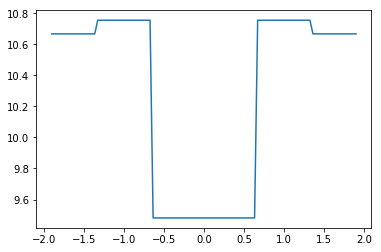

In [83]:
plt.plot(t,Q_1_d)

**<font color='red'>Question 1.</font> What is the worst threshold value (to perform a split) according to the variance criterion?**

<font color = 'red'> **Answer options:** </font>
- -1.9
- -1.3
- 0
- 1.3
- 1.9 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Then let's make splitting in each of the leaves nodes. 
<br> Take your tree with first threshold [$x<0$].
<br> Now add a split in the left branch (where previous split was $x < 0$) using the criterion $[x < -1.5]$, in the right branch (where previous split was $x \geqslant 0$) with the following criterion $[x < 1.5]$. 
<br>It gives us a tree of depth 2 with 7 nodes and 4 leaves. Create a plot of this tree predictions for $x \in [-2, 2]$.

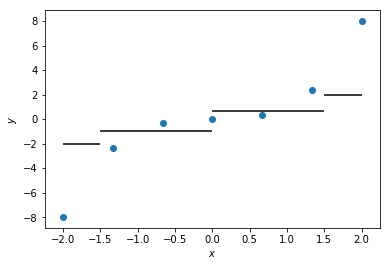

In [160]:
def split(arr, cond):
    return [arr[cond], arr[~cond]]


#X= pd.DataFrame(X)
[X_0,X_1]=split(X,X<0)
#y = pd.DataFrame(y)
[y_0,y_1]=split(y,X<0)


[X_2,X_3]=split(X_0,X_0<-1.5)
[y_2,y_3]=split(y_0,X_0<-1.5)

[X_4,X_5]=split(X_1,X_1>=1.5)
[y_4,y_5]=split(y_1,X_1>=1.5)


X_stack=np.hstack((X_2.mean(), X_3.mean(),X_5.mean(),X_4.mean()))
"""
#Four_depth_array=[X_2.mean,X_3.mean,X_4.mean,X_5.mean]

X_2=np.ones(np.shape(X_2))*X_2.mean()
X_3=np.ones(np.shape(X_3))*X_3.mean()
X_4=np.ones(np.shape(X_4))*X_4.mean()
X_5=np.ones(np.shape(X_5))*X_5.mean()
#print(X_2,X_3,X_5,X_4)

X_upt=np.hstack((X_2, X_3,X_5,X_4))

print(X_stack)
"""

min_max_range=[-2,-1.5,0,1.5,2]

for i in range(len(min_max_range)-1):
             
             
    plt.hlines(X_stack[i],min_max_range[i],min_max_range[i+1])

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

#print(X_2,X_3,X_4,X_5)
#print(y_2,y_3,y_4,y_5)




**<font color='red'>Question 2.</font> Tree predictions is a piecewise-constant function, right? How many "pieces" (horizontal segments in the plot that you've just built) are there in the interval [-2, 2]?**

<font color = 'red'> **Answer options:** </font>
- 2
- 4
- 6
- 8

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

## 2. Building a decision tree for predicting heart diseases
Let's read the data on heart diseases. The dataset can be downloaded from the course repo from [here](https://github.com/Yorko/mlcourse.ai/blob/master/data/mlbootcamp5_train.csv) by clicking on `Download` and then selecting `Save As` option. If you work with Git, then the dataset is already there in `data/mlbootcamp5_train.csv`.

**Problem**

Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [340]:
df = pd.read_csv('mlbootcamp5_train.csv', index_col='id', sep=';')


In [341]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [342]:
import numpy as np
df["age"] = (df["age"]/365.25).apply(np.floor)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: 
- create "age in years" dividing age by 365.25 and taking floor ($\lfloor{x}\rfloor$ is the largest integer that is less than or equal to $x$) 
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.
<br> Binary features equal to 1, 2 or 3. This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use `pandas.get_dummies`. There is no need to use the original features `cholesterol` and `gluc` after encoding.

In [343]:
df_1 = pd.get_dummies(df["cholesterol"],prefix=('Cholosterol'))
df_2 = pd.get_dummies(df["gluc"],prefix=("Gluc"))

df= pd.concat([df,df_1,df_2],axis=1)
#df=df.drop(["cholosterol","gluc"],axis=1)

df.head()

#df_2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3,Gluc_1,Gluc_2,Gluc_3
id,,,,,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1,0,0,1,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,0,0,1,1,0,0
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1,0,0,1,1,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0,1,0,0
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0,1,0,0,1,0,0


In [344]:
df=df.drop(columns = ["cholesterol","gluc"])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3,Gluc_1,Gluc_2,Gluc_3
id,,,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,55.0,1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,51.0,1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,48.0,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,47.0,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0


Split data into train and holdout parts in the proportion of 7/3 using `sklearn.model_selection.train_test_split` with `random_state=17`.

In [256]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'cardio', 'Cholosterol_1', 'Cholosterol_2', 'Cholosterol_3',
       'Gluc_1', 'Gluc_2', 'Gluc_3'],
      dtype='object')

In [257]:
from sklearn.model_selection import train_test_split


X=df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',  \
       'active', 'Cholosterol_1', 'Cholosterol_2', 'Cholosterol_3', \
       'Gluc_1', 'Gluc_2', 'Gluc_3']]

y=df['cardio']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [20]:
X_train.head()
#y_train.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,Cholosterol_1,Cholosterol_2,Cholosterol_3,Gluc_1,Gluc_2,Gluc_3
id,,,,,,,,,,,,,,,
30908,49.0,2,169,76.0,160,80,0,0,1,1,0,0,1,0,0
86475,47.0,2,158,68.0,140,90,1,0,1,1,0,0,1,0,0
77291,61.0,1,165,70.0,120,80,0,0,1,1,0,0,0,1,0
63162,45.0,1,140,70.0,140,90,0,0,0,1,0,0,1,0,0
43647,48.0,2,172,101.0,120,80,0,0,0,1,0,0,1,0,0


Train a decision tree on the dataset `(X_train, y_train)` with **max depth equal to 3** and `random_state=17`. Plot this tree with `sklearn.tree.export_graphviz` and Graphviz. Here we need to mention that `sklearn` doesn't draw decision trees on its own, but is able to output a tree in the `.dot` format that can be used by Graphviz for visualization. 

How to plot a decision tree, alternatives:
 1. Install Graphviz and pydotpus yourself (see below)
 2. Use our docker image with all needed packages already installed
 3. Easy way: execute `print(dot_data.getvalue())` with `dot_data` defined below (this can be done without pydotplus and Graphviz), go to http://www.webgraphviz.com, paste the graph code string (digraph Tree {...) and generate a nice picture

There are may be some troubles with graphviz for Windows users.
The error is 'GraphViz's executables not found'.
<br>To fix that - install Graphviz from [here](https://graphviz.gitlab.io/_pages/Download/Download_windows.html).
<br>Then add graphviz path to your system PATH variable. You can do this manually, but don't forget to restart kernel.
<br>Or just run this code:

In [21]:
import os
#path_to_graphviz = 'C:\Program Files (x86)\Graphviz2.38\bin' # your path to graphviz (C:\\Program Files (x86)\\Graphviz2.38\\bin\\ for example) 
#os.environ["PATH"] += os.pathsep + path_to_graphviz
from IPython.display import Image

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(X_train, y_train)

# some code to depict separating surface
"""
xx, yy = get_grid(pd.concat([X_train,y_train],axis=1))
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
"""

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=X_train.columns, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    Showing_Image=Image(graph.create_png())
    return Showing_Image

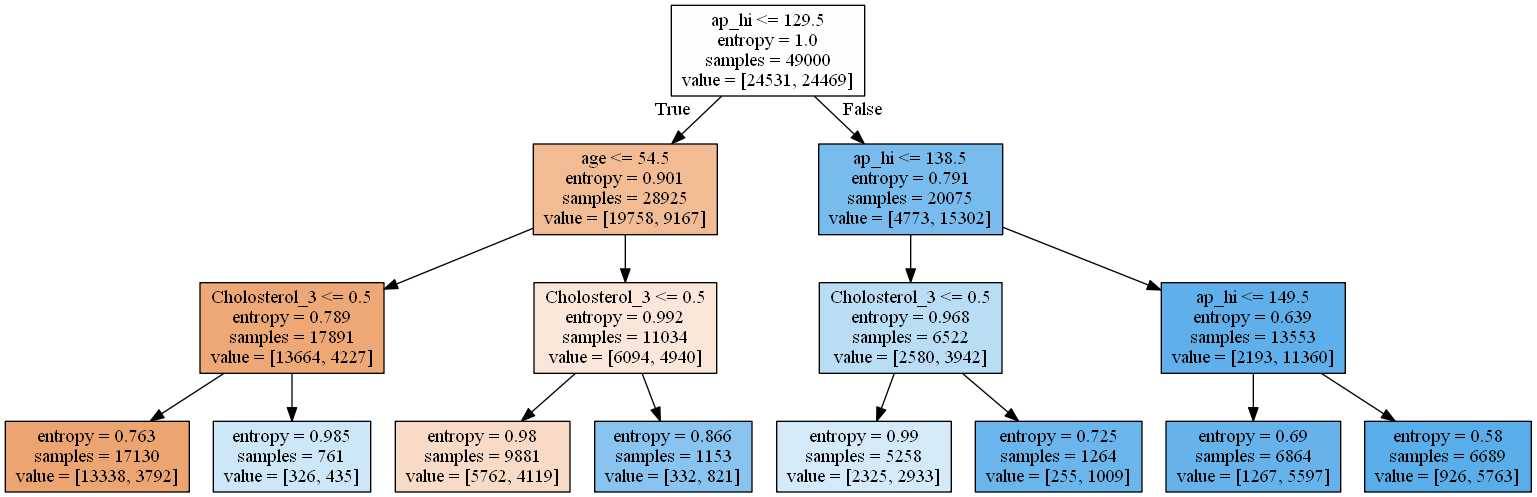

In [23]:
tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
                  png_file_to_save='topic3_decision_tree1.png')

Take a look how trees are visualized in the [3rd part](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true) of course materials.

**<font color='red'>Question 3.</font> Which 3 features are used to make predictions in the created decision tree?**

<font color = 'red'> **Answer options:** </font>
- age, ap_lo, chol=1
- age, ap_hi, chol=3
- smoke, age, gender
- alco, weight, gluc=3

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Make predictions for holdout data `(X_valid, y_valid)` with the trained decision tree. Calculate accuracy.

In [192]:
y_pred = clf_tree.predict(X_valid)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [193]:
print ("Accuracy is ", accuracy_score(y_valid,y_pred)*100)

Accuracy is  72.12857142857143


Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=17` and change  `max_depth` from 2 to 10.

In [26]:
clf_tree.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tree_params = {'max_depth': list(range(2, 11))}

scores = ["accuracy"]

tree_grid = GridSearchCV

for score in scores:

    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = tree_grid(clf_tree,param_grid=tree_params, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_valid, clf.predict(X_valid)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 6}

Grid scores on development set:

0.716 (+/-0.007) for {'max_depth': 2}
0.728 (+/-0.010) for {'max_depth': 3}
0.731 (+/-0.009) for {'max_depth': 4}
0.731 (+/-0.010) for {'max_depth': 5}
0.732 (+/-0.009) for {'max_depth': 6}
0.730 (+/-0.006) for {'max_depth': 7}
0.731 (+/-0.009) for {'max_depth': 8}
0.730 (+/-0.009) for {'max_depth': 9}
0.728 (+/-0.009) for {'max_depth': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.71      0.76      0.73     10490
          1       0.74      0.69      0.72     10510

avg / total       0.73      0.73      0.73     21000




Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

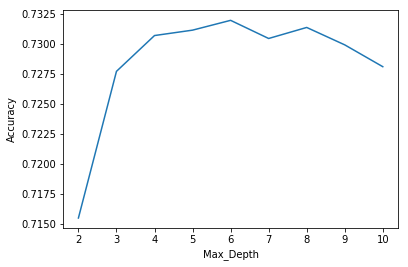

In [189]:
Max_Depth=pd.DataFrame(tree_params)
Max_Depth

plt.plot(Max_Depth,means)
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy");
plt.show()


In [28]:
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))    

0.716 (+/-0.007) for {'max_depth': 2}
0.728 (+/-0.010) for {'max_depth': 3}
0.731 (+/-0.009) for {'max_depth': 4}
0.731 (+/-0.010) for {'max_depth': 5}
0.732 (+/-0.009) for {'max_depth': 6}
0.730 (+/-0.006) for {'max_depth': 7}
0.731 (+/-0.009) for {'max_depth': 8}
0.730 (+/-0.009) for {'max_depth': 9}
0.728 (+/-0.009) for {'max_depth': 10}


Print the best value of `max_depth` where the mean value of cross-validation quality metric reaches maximum. Also compute accuracy on holdout data. This can be done with the trained instance of the class `GridSearchCV`.

In [197]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_valid)
y_pred

Accuracy_holdout = accuracy_score(y_valid,y_pred)*100
Accuracy_holdout

72.12857142857143

Сalculate the effect of `GridSearchCV`: check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively.

In [230]:
Best_depth=clf.best_params_["max_depth"]

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=Best_depth, 
                                  random_state=17)

# training the tree
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_valid)
y_pred

Accuracy_improved = accuracy_score(y_valid,y_pred)*100
Accuracy_improved

72.5904761904762

In [239]:
Improvement=((Accuracy_improved-Accuracy_holdout)/Accuracy_holdout)*100
print(str(round(Improvement,2))+"%")

0.64%


**<font color='red'>Question 4.</font> Choose all correct statements.**

<font color = 'red'> **Answer options:** </font>

- There exists a local maximum of accuracy on the built validation curve
- `GridSearchCV` increased holdout accuracy by **more** than 1%
- There is **no** local maximum of accuracy on the built validation curve
- `GridSearchCV` increased holdout accuracy by **less** than 1%

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Take a look at the SCORE table to estimate ten-year risk of fatal cardiovascular disease in Europe. [Source paper](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src='../../img/SCORE2007-eng.png' width=70%>

Let's create new features according to this picture:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 features)
- systolic blood pressure: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 features)

If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal to zero. 

<br>Add a ``smoke`` feature.
<br>Build the ``cholesterol``  and ``gender`` features. Transform the ``cholesterol`` to 3 binary features according to it's 3 unique values ( ``cholesterol``=1,  ``cholesterol``=2 and  ``cholesterol``=3). Transform the ``gender`` from 1 and 2 into 0 and 1. It is better to rename it to ``male`` (0 – woman, 1 – man). In general, this is typically done with ``sklearn.preprocessing.LabelEncoder`` but here in case of only 2 unique values it's not necessary.

Finally, the decision tree is built using these 12 binary features (excluding all original features that we had before this feature engineering part).

Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.

**<font color='red'>Question 5.</font> Which binary feature is the most important for heart disease detection (i.e., it is placed in the root of the tree)?**

<font color = 'red'> **Answer options:** </font>

- Systolic blood pressure from 160 to 180 (mmHg)
- Cholesterol level == 3
- Systolic blood pressure from 140 to 160 (mmHg)
- Age from 50 to 55 (years)
- Smokes / doesn't smoke
- Age from 60 to 65 (years)

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

In [345]:
bins = pd.IntervalIndex.from_tuples([(40, 50), (50, 55), (55, 60), (60,65)],closed="left")
df.age=pd.cut(df.age,bins=bins,retbins=False)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3,Gluc_1,Gluc_2,Gluc_3
id,,,,,,,,,,,,,,,,
0,"[50, 55)",2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,"[55, 60)",1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,"[50, 55)",1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,"[40, 50)",2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,"[40, 50)",1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0


In [346]:
bins = pd.IntervalIndex.from_tuples([(120, 140), (140, 160), (160, 180)],closed="left")
df.ap_hi=pd.cut(df.ap_hi,bins=bins,retbins=False)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3,Gluc_1,Gluc_2,Gluc_3
id,,,,,,,,,,,,,,,,
0,"[50, 55)",2,168,62.0,NaN,80,0,0,1,0,1,0,0,1,0,0
1,"[55, 60)",1,156,85.0,"[140, 160)",90,0,0,1,1,0,0,1,1,0,0
2,"[50, 55)",1,165,64.0,"[120, 140)",70,0,0,0,1,0,0,1,1,0,0
3,"[40, 50)",2,169,82.0,"[140, 160)",100,0,0,1,1,1,0,0,1,0,0
4,"[40, 50)",1,156,56.0,NaN,60,0,0,0,0,1,0,0,1,0,0


In [347]:
new_df =df.drop(columns=["height","weight","ap_lo","alco","active","Gluc_1","Gluc_2","Gluc_3"])
new_df.head()

,age,gender,ap_hi,smoke,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3
id,,,,,,,,
0,"[50, 55)",2,NaN,0,0,1,0,0
1,"[55, 60)",1,"[140, 160)",0,1,0,0,1
2,"[50, 55)",1,"[120, 140)",0,1,0,0,1
3,"[40, 50)",2,"[140, 160)",0,1,1,0,0
4,"[40, 50)",1,NaN,0,0,1,0,0


In [348]:
new_df.gender = df.gender.map({2: 1, 1: 0})
new_df.head()

,age,gender,ap_hi,smoke,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3
id,,,,,,,,
0,"[50, 55)",1,NaN,0,0,1,0,0
1,"[55, 60)",0,"[140, 160)",0,1,0,0,1
2,"[50, 55)",0,"[120, 140)",0,1,0,0,1
3,"[40, 50)",1,"[140, 160)",0,1,1,0,0
4,"[40, 50)",0,NaN,0,0,1,0,0


In [304]:
new_df.age.replace(np.nan, 0,inplace=True)
new_df.ap_hi.replace(np.nan, 0,inplace=True)

In [349]:
df_1=pd.get_dummies(new_df["age"],prefix="age")
df_2=pd.get_dummies(new_df["ap_hi"],prefix="ap_hi")
df_1.head()


,"age_[40, 50)","age_[50, 55)","age_[55, 60)","age_[60, 65)"
id,,,,
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0


In [350]:
new_df=pd.concat([new_df,df_1,df_2],axis=1)
new_df.head()

,age,gender,ap_hi,smoke,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3,"age_[40, 50)","age_[50, 55)","age_[55, 60)","age_[60, 65)","ap_hi_[120, 140)","ap_hi_[140, 160)","ap_hi_[160, 180)"
id,,,,,,,,,,,,,,,
0,"[50, 55)",1,NaN,0,0,1,0,0,0,1,0,0,0,0,0
1,"[55, 60)",0,"[140, 160)",0,1,0,0,1,0,0,1,0,0,1,0
2,"[50, 55)",0,"[120, 140)",0,1,0,0,1,0,1,0,0,1,0,0
3,"[40, 50)",1,"[140, 160)",0,1,1,0,0,1,0,0,0,0,1,0
4,"[40, 50)",0,NaN,0,0,1,0,0,1,0,0,0,0,0,0


In [351]:
new_df=new_df.drop(columns=["age","ap_hi"])
new_df.head()

,gender,smoke,cardio,Cholosterol_1,Cholosterol_2,Cholosterol_3,"age_[40, 50)","age_[50, 55)","age_[55, 60)","age_[60, 65)","ap_hi_[120, 140)","ap_hi_[140, 160)","ap_hi_[160, 180)"
id,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,1,0,0
3,1,0,1,1,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0


In [352]:
new_df.columns

Index(['gender', 'smoke', 'cardio', 'Cholosterol_1', 'Cholosterol_2',
       'Cholosterol_3', 'age_[40, 50)', 'age_[50, 55)', 'age_[55, 60)',
       'age_[60, 65)', 'ap_hi_[120, 140)', 'ap_hi_[140, 160)',
       'ap_hi_[160, 180)'],
      dtype='object')

In [353]:
X=new_df[['gender', 'smoke', 'Cholosterol_1', 'Cholosterol_2',
       'Cholosterol_3', 'age_[40, 50)', 'age_[50, 55)', 'age_[55, 60)',
       'age_[60, 65)', 'ap_hi_[120, 140)', 'ap_hi_[140, 160)',
       'ap_hi_[160, 180)']]
y=new_df['cardio']

In [354]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [355]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(X_train, y_train)

# some code to depict separating surface
"""
xx, yy = get_grid(pd.concat([X_train,y_train],axis=1))
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
"""

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=X_train.columns, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    Showing_Image=Image(graph.create_png())
    return Showing_Image

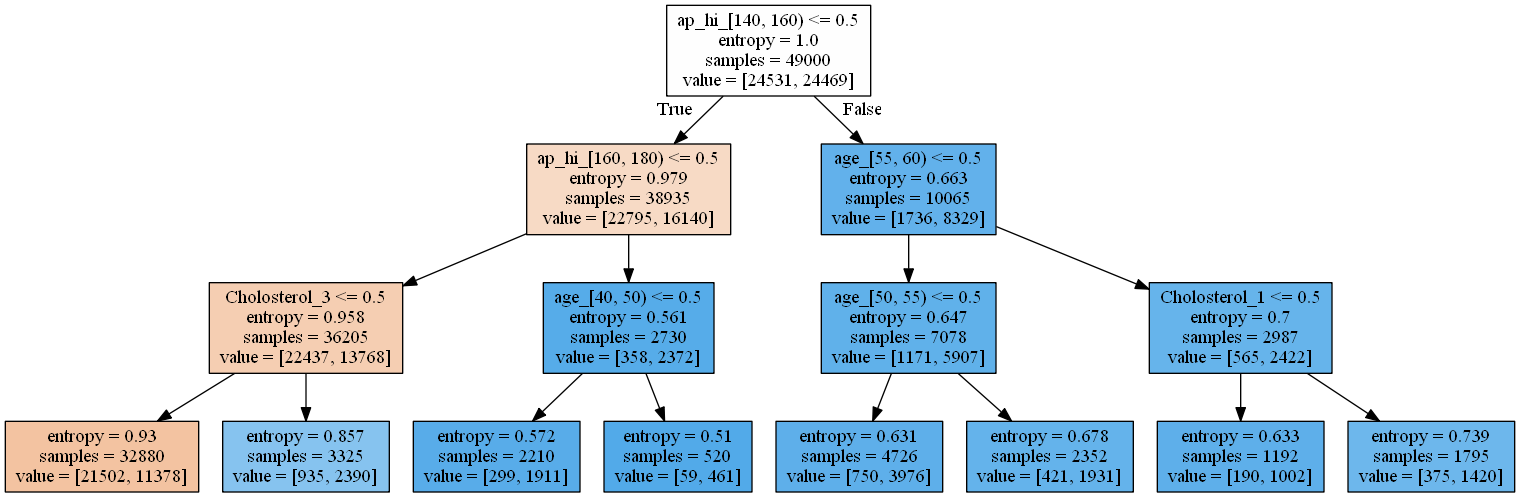

In [356]:
tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
                  png_file_to_save='topic3_decision_tree1.png')

In [359]:
y_pred = clf_tree.predict(X_valid)
print ("Accuracy is ", round(accuracy_score(y_valid,y_pred)*100))

Accuracy is  70.0
